seaborn 라이브러리를 활용하여 데이터셋 visulaizing

In [8]:
#cat iris_dataset.csv

Pandas를 활용하여 데이터 로드

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = pd.read_csv("iris_dataset.csv")
csv = iris[['class']] #꽃잎 데이터


# 클래스를 index 번호로 치환
i = 0
for item in csv['class']:
    if item == 'Iris-setosa':
        csv['class'][i] = 0 #작은 꽃잎을 가짐
    elif item == 'Iris-versicolor':
        csv['class'][i] = 1
    elif item == 'Iris-virginica' :
        csv['class'][i] = 2 #큰 꽃잎을 가짐
    i = i + 1

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
print iris.head()
print iris.tail()

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
     sepal_length  sepal_width  petal_length  petal_width           class
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica


In [3]:
import seaborn as sea
%matplotlib inline

#sea.pairplot(iris, vars=["petal_width", "petal_length"], hue="class", palette="husl", kind='reg')

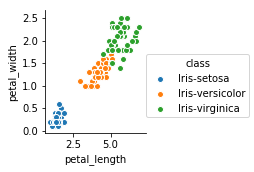

In [4]:
sea.pairplot(iris, x_vars=["petal_length"],
                   y_vars=["petal_width" ], hue='class')

**setosa 클래스와 그 외 다른 클래스는 정확히 분류될 수 있음을 확인**

In [5]:
from sklearn.model_selection import train_test_split
data = iris[['petal_length','petal_width']]

# class가 '0'이라면, True, 그렇지 않을 경우 False이며, 결국 setosa는 1로 맵핑
target = (csv == 0).astype(np.int) 

#트레이닝 셋과 테스트 셋을 자동으로 분류해주는 역할
X_train, X_test, Y_train, Y_test = train_test_split(data.get_values(), target.get_values(), test_size=0, random_state=42)
print len(X_train), len(X_test)
'''
for i,x in enumerate(X_train.tolist()):
    print i,x
for i,y in enumerate(Y_train):
    print i,y
'''
#trainning
clf = Perceptron(random_state=42)
clf.fit(X_train.tolist(), Y_train)

150 0


/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=5, n_iter=None, n_jobs=1, penalty=None, random_state=42,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [6]:
#pred_iris = pd.read_csv("iris_dataset_test.csv")
#print pred_iris["petal_length"].tolist

#이 배열을 확인해보면, 학습 데이터는 배열 내 배열 하나씩 입력하게 되며, input vector로는 배열 내 각 요소가 입력된다.
#따라서 현재 구현된 퍼셉트론은 2개의 input을 받고, 가중치 연산 후 합산하여 단위계단 함수로 결과를 출력한다.
testdata = [[6.3, 2.7], [2.3, 1.5], [4.7,1.1], [2.8, 1.0], 
            [1.5, 1.0],[2.3, 0.3],[1.1, 0.3], [1.1, 0.5], [2,0.5]]

for x,y in testdata:
    #plt.scatter(x,y)
    print x+y
    
# 본 예제에서 Perceptron은 petal의 각 너비와 길이마다 가중치가 다르게 적용되어, 합산 후 0 또는 1로 활성화 조건을 달성
#꽃잎이 작은 setosa 는 1로, 나머진 0으로 매칭하도록 설정
for i in testdata:
    y_pred = clf.predict([i])
    print y_pred

    
#수치를 변경하여 적용할때마다 확인한 결과 임계치 2.5를 넘기면 큰 꽃잎, 못 넘기면 작은 꽃잎으로 분류

9.0
3.8
5.8
3.8
2.5
2.6
1.4
1.6
2.5
[0]
[0]
[0]
[0]
[1]
[1]
[1]
[1]
[1]
